# Task 2: Visualizing fire scars through false color
#### Author: Vedika Shirtekar 
#### GitHub Repository Assignment Link: https://github.com/vedikaS-byte/eds220-hwk4

## About this notebook


### Purpose
In January 2025, Los Angeles County experienced two catastrophic fires: the Eaton and Palisades Fires. Each fire burned nearly 10,000 acres and forced thousands of residents to evacuate (Neuman, 2025). Strong Santa Ana winds intensified the fires, complicating containment efforts, as the flames not only funneled through mountain passes but also spread over ridges and into surrounding basins (Neuman, 2025). The fires caused widespread displacement, killed at least 28 people, destroyed over 16,000 structures, and inflicted significant ecological damage (Phillips, 2025).


This assignment focuses on applying geospatial analysis and working with environmental datasets using Python libraries such as `geopandas` and `xarray`. A false color image of the Eaton and Palisades Fires was generated from remote sensing data to emphasize the fire scars and illustrate how coding and data visualization can aid environmental monitoring. 

### Highlights
Three key highlights of this coding excersise are included below: 

- **Remote sensing allows for quantitative and spatial mapping of fire impact.** Using Python tools such as `xarray` and `geopandas` to process satellite raster data allows individuals to identify fire-scar perimeters and produce maps that outline the burned extent. This allows for precise spatial context to the fire damage. 

- **The coordinate reference system (CRS) is important when handling and mapping multiple geospatial objects to ensure accurate spatial analysis**. When combining multiple geospatial datasets (ex. fire perimeters and satellite imagery), having consistent CRS prevents misalignment, ensures correct distance and area measurements, and allows layers to overlay properly on maps.

- **False color imagery reveal burn scars in detail and provide insight into vegetation impact.** This analysis utilized different combinations of bands to produce a true color and false color image of burn scars from each fire. By combining shortwave infrared, near-infrared, and visible light bands, false-color composites clearly distinguish between healthy vegetation and recently burned areas, providing detailed insight into fire-affected landscapes (Earth Observatory, 2025).


### About the data
This analysis utilized two datasets. The first consists of a streamlined set of spectral bands (red, green, blue, near-infrared, and shortwave infrared) derived from the Landsat Collection 2 Level-2 surface reflectance data, which was atmospherically corrected and captured by the Landsat 8 satellite.The dataset was obtained from the Microsoft Planetary Computer catalog and cropped to the region encompassing the fire perimeters. It is purely intended for visualization and educational use and is accessible as `landsat8-2025-02-23-palisades-eaton.nc` through the shared resources for the EDS 220 course.




The second dataset contains fire perimeters for the Palisades and Eaton fires. Geospatial layers containing dissolved fire perimeters/boundaries (shapefiles) for Eaton and Palisades fires were downloaded from the County of Los Angeles Enterprise GIS. It is noted in the data summary that the original NIFC FIRIS fire service contained daily captures of fire perimeters and were thus dissolved from boundary polygons to create a single fire burn perimeter for each fire (County of Los Angeles, 2025).

### References

Bren School of Environmental Science and Management. (2025). *landsat8-2025-02-23-palisades-eaton.nc* [Dataset]. Accessed November 20, 2025, from https://drive.google.com/drive/u/1/folders/1USqhiMLyN8GE05B8WJmHabviJGnmAsLP



County of Los Angeles Enterprise GIS. (2025). *Palisades and Eaton Dissolved Fire Perimeters (2025)* [Dataset]. County of Los Angeles. Accessed November 20, 2025, from 
https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about







Microsoft Planetary Computer. (n.d.). *Landsat Collection 2 Level-2*. Accessed November 20, 2025, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2


## Section 2: Fire perimeter data exploration
This section covers the loading and exploration of each fire perimeter shapefile, along with a brief description of key dataset characteristics, including the CRS and whether the data are in a projected coordinate system.

a. Import the neccessary libraries and read in each fire perimeter. 

In [136]:
# Import necessary libraries along with defined abbreviations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import xarray as xr
import matplotlib.patches as mpatches

In [137]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

## Import the fire perimeters

# Establish file path to read in eaton shapefile
eaton_fp =os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton = gpd.read_file(eaton_fp)

# Establish file path to read in palisades shapefile
palisades_fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades = gpd.read_file(palisades_fp)

In ***separate subsections*** for each fire: 

b. Extract the fire perimeter data to identify key components of data exploration. 

c. Identify the CRS and confirm whether the data are in a projected or geographic format. Each fire should be explored individually, with findings presented in separate subsections.

**Include a summary of key findings at the end of each subsection.**

#### Exploring the Eaton Fire Shapefile

In [138]:
# Check the first few rows 
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [139]:
# Explore data types, dimensions, and additional attributes
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [140]:
# Check the projected CRS
print(f"The CRS of the Eaton Fires shapefile is {eaton.crs.name} ({eaton.crs}).")

The CRS of the Eaton Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


In [162]:
# Check for whether Eaton shapefile is projected or geographic
print(f"Is the Eaton fire perimeter projected:", {eaton.crs.is_projected})

Is the Eaton fire perimeter projected: {True}


Text(0.5, 1.0, 'Eaton Fire Perimeter')

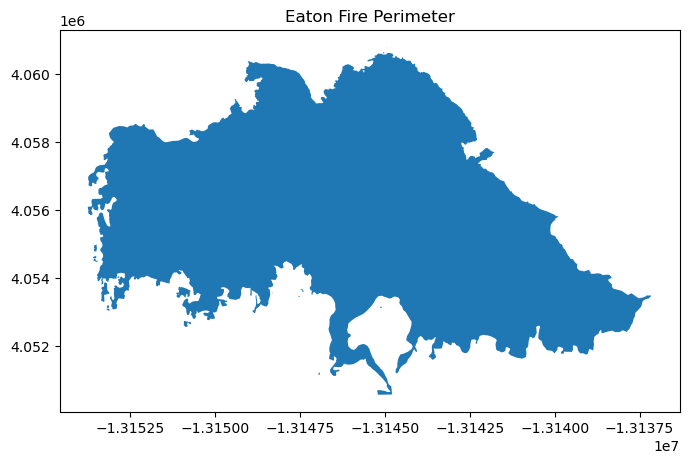

In [169]:
# OPTIONAL: Visualize Eaton fire extent 
ax = eaton.plot(figsize=(8, 8))
ax.set_title("Eaton Fire Perimeter")

The `eaton` fire perimeter dataset includes five attributes: `OBJECTID`, `type`, `Shape__Are`, `Shape__Len`, and a `geometry`. The `OBJECTID` variable is stored as an `int64`, `type` appears as an `object` (likely a string), and both `Shape__Are` and `Shape__Len` are represented as `float64` values, while the `geometry` column stores spatial features. All 20 records are complete with no missing values observed. The `eaton` shapefile, loaded as a `geopandas GeoDataFrame`, is projected and is stored in the WGS 84 / Pseudo-Mercator CRS, identified by EPSG code 3857. 

#### Exploring the Palisades Fire Shapefile

In [142]:
# Check the first few rows 
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [143]:
# Explore data types, dimensions, and additional attributes
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [144]:
# Check the projected CRS
print(f"The CRS of the Palisades Fires shapefile is {palisades.crs.name} ({palisades.crs}).")

The CRS of the Palisades Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


In [163]:
# Check for whether Palisades shapefile is projected or geographic
print(f"Is the Palisades fire perimeter projected:", {palisades.crs.is_projected})

Is the Palisades fire perimeter projected: {True}


Text(0.5, 1.0, 'Palisades Fire Perimeter')

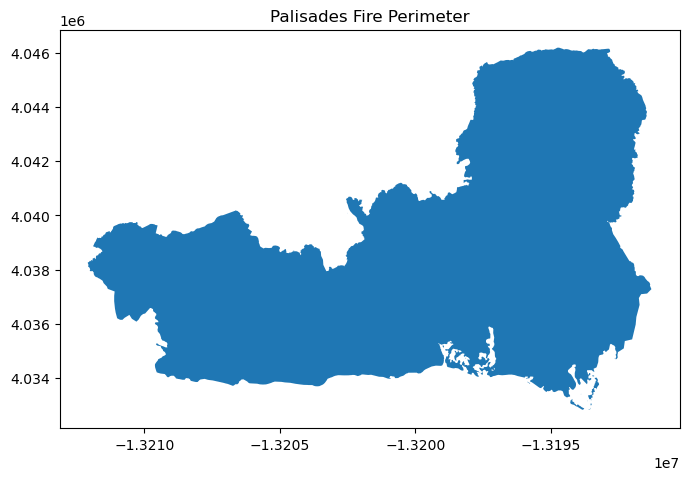

In [168]:
# OPTIONAL: Visualize Palisades fire extent 
ax = palisades.plot(figsize=(8, 8))
ax.set_title("Palisades Fire Perimeter")

The `palisades` fire perimeter dataset includes five attributes: `OBJECTID`, `type`, `Shape__Are`, `Shape__Len`, and a `geometry`. The `OBJECTID` variable is stored as an `int64`, `type` appears as an `object` (likely a string), and both `Shape__Are` and `Shape__Len` are represented as `float64` values, while the `geometry` column stores spatial features. All 21 records are complete with no missing values observed. The `palisades` shapefile, loaded as a `geopandas GeoDataFrame`, is projected and stored in the WGS 84 / Pseudo-Mercator CRS, identified by EPSG code 3857. 

## Section 3: NetCDF data import and exploration
This section covers the loading and exploration of the NetCDF (`landsat8-2025-02-23-palisades-eaton.nc`), along with a brief description of key dataset characteristics such as the variables, dimensions, and coordinates. 

When working outside of the Workbench environment, the EDS-220 conda environment should be updated prior to reading the NetCDF file. The instructions below outline the required terminal commands.
 
 In the terminal: 
 
a. Install the `netCDF4` package in the EDS 220 environment by running: `conda install -c conda-forge netcdf4`.

b. Verify that the `netcdf4` package was installed.

After confirming that the `netcdf4` package is successfully installed in the updated EDS 220 environment, the data exploration process can begin.

a. Read in the NetCDF (`landsat8-2025-02-23-palisades-eaton.nc`). 

In [147]:
# Read in and open landsat data 
palisades_eaton = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc")

b. Explore and briefly describe the data’s variables, dimensions, and coordinates. 

In [171]:
# Observe variables as well as their attributes and dimensions
palisades_eaton

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB 1.024e+04 9.886e+03 ... 1.019e+04 9.967e+03
    green        (y, x) float32 16MB 9.93e+03 9.687e+03 ... 9.984e+03 9.662e+03
    blue         (y, x) float32 16MB 9.29e+03 9.183e+03 ... 9.49e+03 9.187e+03
    nir08        (y, x) float32 16MB 1.331e+04 1.313e+04 ... 1.287e+04 1.306e+04
    swir22       (y, x) float32 16MB 1.43e+04 1.437e+04 ... 1.406e+04 1.329e+04
    spatial_ref  int64 8B 0

In [187]:
# Extract the variable data types (dictionary used for visual reference)
print(f"Variable data types: {dict(palisades_eaton.dtypes)}")

Variable data types: {'red': dtype('float32'), 'green': dtype('float32'), 'blue': dtype('float32'), 'nir08': dtype('float32'), 'swir22': dtype('float32'), 'spatial_ref': dtype('int64')}


In [188]:
# Extract the dimensions (dictionary used for visual reference)
print(f"Dimensions: {dict(palisades_eaton.sizes)}")

Dimensions: {'y': 1418, 'x': 2742}


In [190]:
# Identify the min and max coordinate for each dimension to obtain only one coordinate each

# Print the coordinates for x
print("Coordinates x min:", palisades_eaton['x'].min().values)
print("Coordinates x max:", palisades_eaton['x'].max().values)

# Print the coordinates for y
print("Coordinates y min:", palisades_eaton['y'].min().values)
print("Coordinates y max:", palisades_eaton['y'].max().values)

# Print the coordinates for time
print("Coordinates time min:", palisades_eaton['time'].min().values)
print("Coordinates time max:", palisades_eaton['time'].max().values)

Coordinates x min: 334410.0
Coordinates x max: 416640.0
Coordinates y min: 3756540.0
Coordinates y max: 3799050.0
Coordinates time min: 2025-02-23T18:28:13.651369000
Coordinates time max: 2025-02-23T18:28:13.651369000


The netCDF palisades_eaton, read in as an `xarray.core.dataset.Dataset`, contains five variables observed from the raw output: `red`, `green`, `blue`, `nir08`, `swir22`, and `spatial_ref`. All color bands are stored as `float32` types while `spatial_ref` is an `int64` type. `palisades_eaton` is structured as a two-dimensional grid with dimensions of 1418 (y) by 2742 (x). The x coordinates span 334,410 to 416,640 units and the y coordinates from 3,756,540 to 3,799,050 units. The temporal coordinate shows a single time of 2025-02-23T18:28:13.651369000.

## Section 4: Restoring geospatial information
Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?

You may have noticed on section 3 that the geospatial information for this dataset is stored in the variable spatial_ref. Print the CRS by using accesing the spatial_ref.crs_wkt attribute of the dataset.

Recover the geospatial information by using rio.write_crs() and the spatial reference information form part b.

Print the CRS of the updated dataset.


In [ ]:
print(f"The landsat geospatial information for the Palisades-Eaton fires includes: {palisades_eaton.x.crs} (longitude) and {palisades_eaton.y.rio.crs} (latitude)")

`palisades_eaton` is a geospatial object. 

In [ ]:
# need to project
palisades_eaton.rio.crs

In [ ]:
#spatial_ref.crs_wkt
palisades_eaton.spatial_ref.crs_wkt

In [ ]:
palisades_eaton = palisades_eaton.rio.write_crs(32611, inplace = True)

## Section 5: True color image
Without creating any new variables:
select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
convert it to a numpy.array using the to_array() method, and then
use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.
Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

To resolve the other warning, identify which bands have nan values. HINT: There are many ways of doing so. One option is to use numpy.isnan().

Use the .fillna() mehtod for xarray.Datasets to substitute the any nan values in the Landsat data for zero.

Create a new true color image that gets plotted without warnings.

In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (e).

In [ ]:
# With warning
palisades_eaton[["red", "green","blue"]].to_array().plot.imshow(robust = True)

In [ ]:
np.isnan(palisades_eaton[["red", "green","blue"]]).sum()

In [ ]:
# Without warning
palisades_eaton[["red", "green","blue"]].to_array().fillna(0).plot.imshow(robust = True)

## Section 6: False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).



In [ ]:
# Plot false color image with method chaining
palisades_eaton[["swir22", "nir08","blue"]].to_array().fillna(0).plot.imshow(robust = True)

## Section 7: Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [ ]:
# Landsat CRS is the reference CRS used for transformation
crs_raster = palisades_eaton.rio.crs

# Transform to match CRS reference
if palisades.crs != crs_raster: 
    palisades = palisades.to_crs(crs_raster)

# Transform to match CRS reference
if eaton.crs != crs_raster: 
    eaton = eaton.to_crs(crs_raster)

In [ ]:
# Create assert tests to check whether corresponding geospatial objects have matching CRS
assert palisades.crs == palisades_eaton.rio.crs, "Palisades shapefile and Landsat imagery do NOT having matching CRS."
assert eaton.crs == palisades_eaton.rio.crs, "Eaton shapefile and Landsat imagery do NOT having matching CRS."

In [ ]:
fig, ax = plt.subplots(figsize = (8,10))

# Define bands of interest
bands = palisades_eaton[["swir22", "nir08","blue"]].to_array().fillna(0)

bands.plot.imshow(
    ax = ax, # Assign axis
    robust = True # No cloud cover
    ) 

# Manually add patches for legend reference
palisades_patch = mpatches.Patch(facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire")
eaton_patch = mpatches.Patch(facecolor = "darkred", edgecolor = "black", label = "Eaton Fire")

# Plot each fire perimeter
palisades.plot(ax = ax, facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire", alpha = .6, linewidth= 2)
eaton.plot(ax = ax, facecolor = "darkred", edgecolor = "black", label = "Eaton Fire", alpha = .6, linewidth = 2)

# Add legend 
ax.legend(handles = [palisades_patch, eaton_patch], loc = "upper left")

ax.set_title("Extent of Palisades and Eaton Fires in Santa Barbara County")

ax.set_axis_off()

plt.show()